In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.utils import check_random_state
from Fungsi.FungsiAktivasi import FungsiAktivasi
from Fungsi.FungsiLoss import FungsiLoss
from Model.FFNN import FFNN
from Fungsi.FungsiAktivasi import FungsiAktivasi, RELU, SIGMOID, LINEAR, TANH, SOFTMAX
from Fungsi.FungsiLoss import FungsiLoss, CCE, MSE, BCE

def run_test(
    n_hidden=1,
    hidden_size=1,
    epochs=10,
    weight_init_method="he",
    activation_hidden = SIGMOID,
    batch_size=10,
    learning_rate=0.01,
    lambda_L1=1e-4,
    lambda_L2=1e-4,
    seed=42
):
    X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
    random_state = check_random_state(seed)
    permutation = random_state.permutation(X.shape[0])
    X, y = X[permutation], y[permutation]

    X = X.reshape((X.shape[0], -1))
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, train_size=5000, test_size=10000, random_state=seed)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=seed)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    lb = LabelBinarizer()
    y_train_onehot = lb.fit_transform(y_train)
    y_val_onehot = lb.transform(y_val)
    y_test_onehot = lb.transform(y_test)

    input_size = X.shape[1]
    output_size = y_train_onehot.shape[1]

    activation_funcs = [LINEAR] + [activation_hidden for _ in range(n_hidden)] + [SOFTMAX]
    weight_inits = [weight_init_method] * (n_hidden + 2)

    ffnn = FFNN(
        X_train, y_train_onehot,
        input_size = input_size,
        hidden_size = hidden_size,
        output_size = output_size,
        n_hidden = n_hidden,
        batch_size = batch_size,
        learning_rate = learning_rate,
        epoch = epochs,
        activation_func = activation_funcs,
        loss_func = CCE,
        weight_init_method = weight_inits,
        lower_bound = -0.1,
        upper_bound = 0.1,
        mean = 0, variance = 0.1,
        seed = seed,
        lambda_L1 = lambda_L1,
        lambda_L2 = lambda_L2
    )

    history = ffnn.train(
        X_train, y_train_onehot,
        X_val=X_val, y_val=y_val_onehot,
        verbose=1
    )

    plt.figure(figsize=(10, 5))
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training vs Validation Loss")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    def accuracy(y_true, y_pred):
        return np.mean(np.argmax(y_true, axis=1) == np.argmax(y_pred, axis=1))

    train_pred = ffnn.predict(X_train)
    test_pred = ffnn.predict(X_test)

    print(f"Train accuracy: {accuracy(y_train_onehot, train_pred):.4f}")
    print(f"Test accuracy: {accuracy(y_test_onehot, test_pred):.4f}")

    return ffnn, history

## Pengaruh Depth dan Width

Depth = n_hidden  
Width = hidden_size

Epoch 1/10 - loss: 2.2160 - val_loss: 2.1519
[████------------------------------------] 10.0%
Epoch 2/10 - loss: 2.1316 - val_loss: 2.1205
[████████--------------------------------] 20.0%
Epoch 3/10 - loss: 2.1102 - val_loss: 2.1100
[████████████----------------------------] 30.0%
Epoch 4/10 - loss: 2.1009 - val_loss: 2.1047
[████████████████------------------------] 40.0%
Epoch 5/10 - loss: 2.0955 - val_loss: 2.1012
[████████████████████--------------------] 50.0%
Epoch 6/10 - loss: 2.0922 - val_loss: 2.0986
[████████████████████████----------------] 60.0%
Epoch 7/10 - loss: 2.0900 - val_loss: 2.0965
[████████████████████████████------------] 70.0%
Epoch 8/10 - loss: 2.0883 - val_loss: 2.0946
[████████████████████████████████--------] 80.0%
Epoch 9/10 - loss: 2.0870 - val_loss: 2.0931
[████████████████████████████████████----] 90.0%
Epoch 10/10 - loss: 2.0858 - val_loss: 2.0917
[████████████████████████████████████████] 100.0%


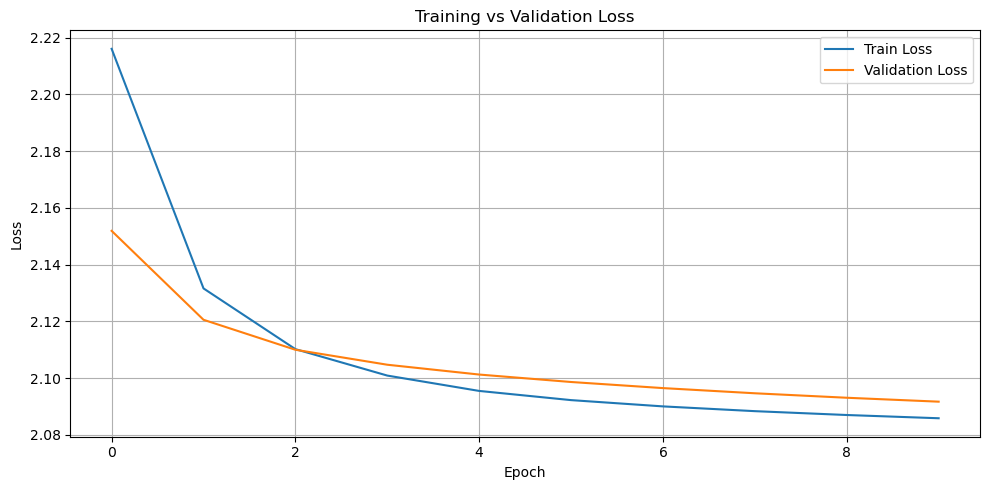

Train accuracy: 0.1998
Test accuracy: 0.2060


In [16]:
model, hist = run_test(n_hidden = 1, hidden_size = 1)

Epoch 1/10 - loss: 2.2312 - val_loss: 2.1956
[████------------------------------------] 10.0%
Epoch 2/10 - loss: 2.1597 - val_loss: 2.1456
[████████--------------------------------] 20.0%
Epoch 3/10 - loss: 2.1183 - val_loss: 2.1162
[████████████----------------------------] 30.0%
Epoch 4/10 - loss: 2.0927 - val_loss: 2.0976
[████████████████------------------------] 40.0%
Epoch 5/10 - loss: 2.0757 - val_loss: 2.0849
[████████████████████--------------------] 50.0%
Epoch 6/10 - loss: 2.0637 - val_loss: 2.0758
[████████████████████████----------------] 60.0%
Epoch 7/10 - loss: 2.0547 - val_loss: 2.0689
[████████████████████████████------------] 70.0%
Epoch 8/10 - loss: 2.0478 - val_loss: 2.0634
[████████████████████████████████--------] 80.0%
Epoch 9/10 - loss: 2.0423 - val_loss: 2.0591
[████████████████████████████████████----] 90.0%
Epoch 10/10 - loss: 2.0377 - val_loss: 2.0556
[████████████████████████████████████████] 100.0%


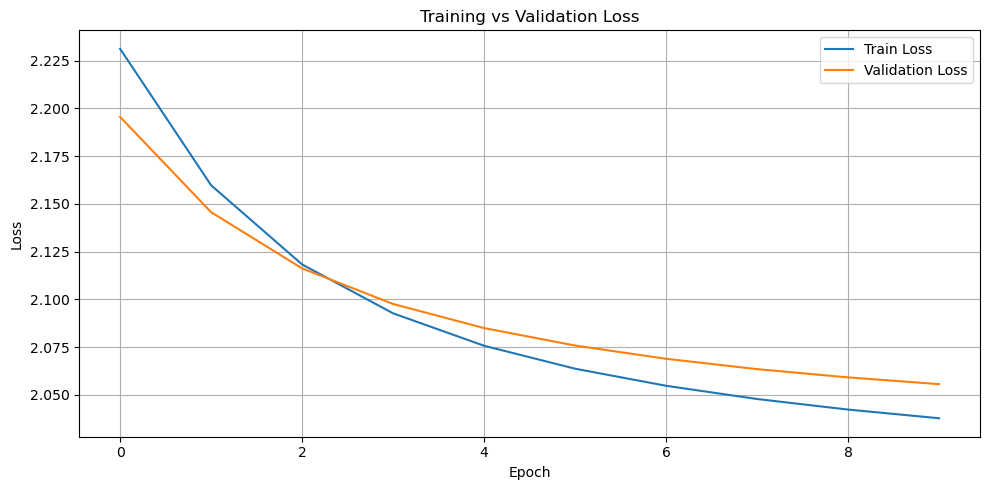

Train accuracy: 0.3070
Test accuracy: 0.3018


In [17]:
model, hist = run_test(n_hidden = 1, hidden_size = 2)

Epoch 1/10 - loss: 2.2829 - val_loss: 2.2059
[████------------------------------------] 10.0%
Epoch 2/10 - loss: 2.1657 - val_loss: 2.1157
[████████--------------------------------] 20.0%
Epoch 3/10 - loss: 2.0958 - val_loss: 2.0612
[████████████----------------------------] 30.0%
Epoch 4/10 - loss: 2.0506 - val_loss: 2.0251
[████████████████------------------------] 40.0%
Epoch 5/10 - loss: 2.0192 - val_loss: 1.9995
[████████████████████--------------------] 50.0%
Epoch 6/10 - loss: 1.9962 - val_loss: 1.9804
[████████████████████████----------------] 60.0%
Epoch 7/10 - loss: 1.9787 - val_loss: 1.9655
[████████████████████████████------------] 70.0%
Epoch 8/10 - loss: 1.9649 - val_loss: 1.9534
[████████████████████████████████--------] 80.0%
Epoch 9/10 - loss: 1.9536 - val_loss: 1.9433
[████████████████████████████████████----] 90.0%
Epoch 10/10 - loss: 1.9442 - val_loss: 1.9346
[████████████████████████████████████████] 100.0%


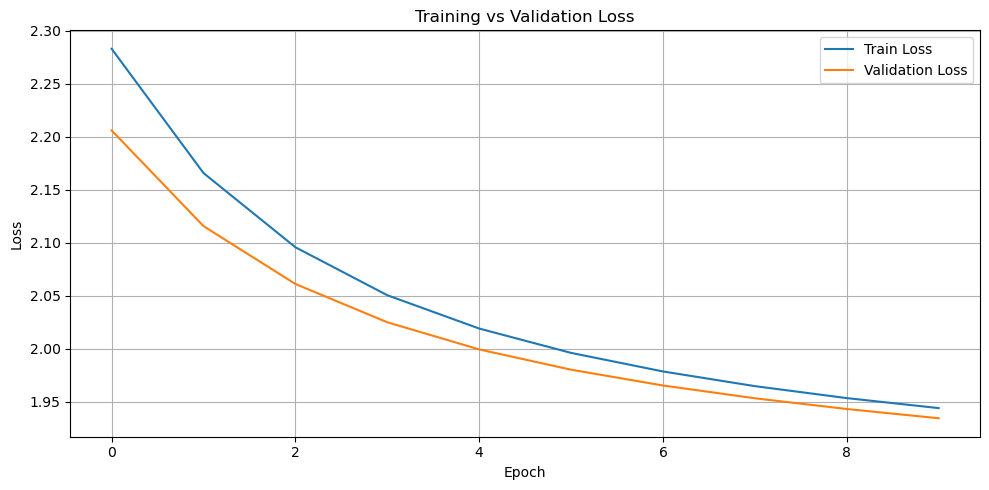

Train accuracy: 0.4175
Test accuracy: 0.4149


In [18]:
model, hist = run_test(n_hidden = 1, hidden_size = 3)

Epoch 1/10 - loss: 2.2944 - val_loss: 2.2907
[████------------------------------------] 10.0%
Epoch 2/10 - loss: 2.2836 - val_loss: 2.2821
[████████--------------------------------] 20.0%
Epoch 3/10 - loss: 2.2744 - val_loss: 2.2750
[████████████----------------------------] 30.0%
Epoch 4/10 - loss: 2.2667 - val_loss: 2.2691
[████████████████------------------------] 40.0%
Epoch 5/10 - loss: 2.2603 - val_loss: 2.2642
[████████████████████--------------------] 50.0%
Epoch 6/10 - loss: 2.2550 - val_loss: 2.2600
[████████████████████████----------------] 60.0%
Epoch 7/10 - loss: 2.2505 - val_loss: 2.2564
[████████████████████████████------------] 70.0%
Epoch 8/10 - loss: 2.2466 - val_loss: 2.2532
[████████████████████████████████--------] 80.0%
Epoch 9/10 - loss: 2.2431 - val_loss: 2.2504
[████████████████████████████████████----] 90.0%
Epoch 10/10 - loss: 2.2401 - val_loss: 2.2478
[████████████████████████████████████████] 100.0%


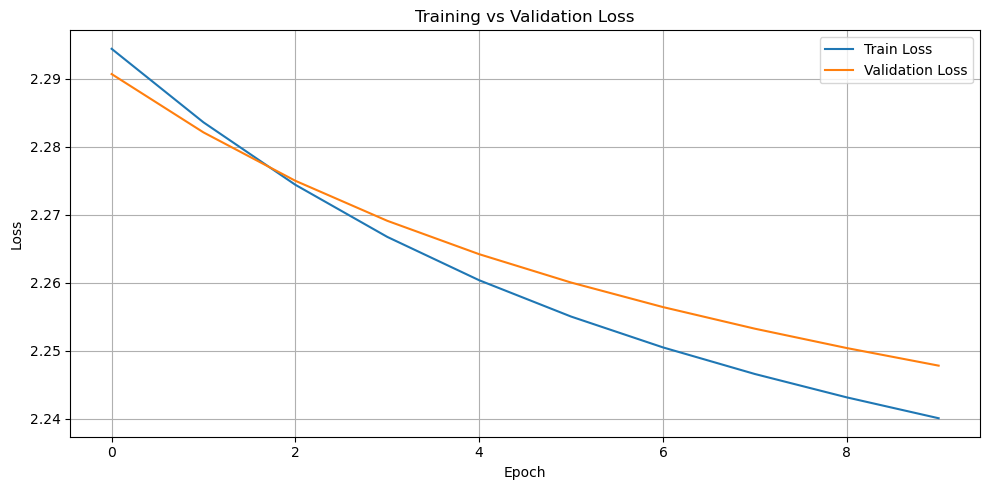

Train accuracy: 0.1810
Test accuracy: 0.1851


In [19]:
model, hist = run_test(n_hidden = 2, hidden_size = 2)

Epoch 1/10 - loss: 2.3126 - val_loss: 2.3126
[████------------------------------------] 10.0%
Epoch 2/10 - loss: 2.3126 - val_loss: 2.3126
[████████--------------------------------] 20.0%
Epoch 3/10 - loss: 2.3125 - val_loss: 2.3125
[████████████----------------------------] 30.0%
Epoch 4/10 - loss: 2.3125 - val_loss: 2.3125
[████████████████------------------------] 40.0%
Epoch 5/10 - loss: 2.3124 - val_loss: 2.3124
[████████████████████--------------------] 50.0%
Epoch 6/10 - loss: 2.3124 - val_loss: 2.3124
[████████████████████████----------------] 60.0%
Epoch 7/10 - loss: 2.3123 - val_loss: 2.3123
[████████████████████████████------------] 70.0%
Epoch 8/10 - loss: 2.3123 - val_loss: 2.3123
[████████████████████████████████--------] 80.0%
Epoch 9/10 - loss: 2.3122 - val_loss: 2.3122
[████████████████████████████████████----] 90.0%
Epoch 10/10 - loss: 2.3121 - val_loss: 2.3122
[████████████████████████████████████████] 100.0%


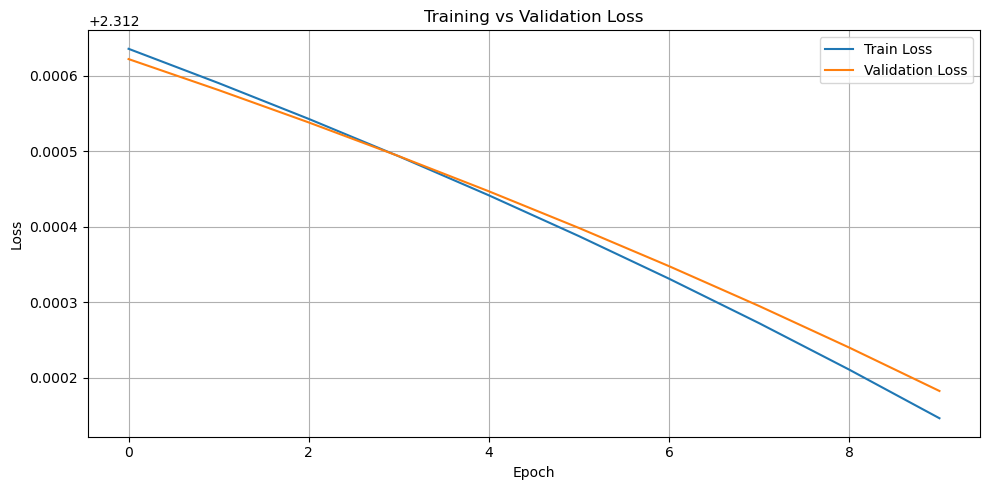

Train accuracy: 0.1153
Test accuracy: 0.1285


In [20]:
model, hist = run_test(n_hidden = 3, hidden_size = 2)

Epoch 1/10 - loss: 2.3137 - val_loss: 2.3137
[████------------------------------------] 10.0%
Epoch 2/10 - loss: 2.3137 - val_loss: 2.3137
[████████--------------------------------] 20.0%
Epoch 3/10 - loss: 2.3137 - val_loss: 2.3137
[████████████----------------------------] 30.0%
Epoch 4/10 - loss: 2.3137 - val_loss: 2.3137
[████████████████------------------------] 40.0%
Epoch 5/10 - loss: 2.3137 - val_loss: 2.3137
[████████████████████--------------------] 50.0%
Epoch 6/10 - loss: 2.3137 - val_loss: 2.3137
[████████████████████████----------------] 60.0%
Epoch 7/10 - loss: 2.3137 - val_loss: 2.3137
[████████████████████████████------------] 70.0%
Epoch 8/10 - loss: 2.3137 - val_loss: 2.3137
[████████████████████████████████--------] 80.0%
Epoch 9/10 - loss: 2.3137 - val_loss: 2.3137
[████████████████████████████████████----] 90.0%
Epoch 10/10 - loss: 2.3137 - val_loss: 2.3137
[████████████████████████████████████████] 100.0%


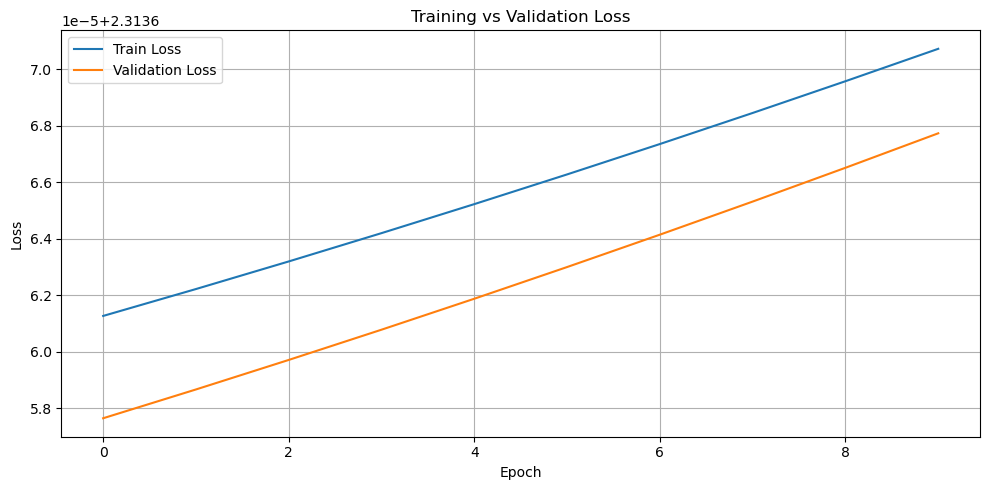

Train accuracy: 0.0668
Test accuracy: 0.0645


In [21]:
model, hist = run_test(n_hidden = 4, hidden_size = 2)

## Pengaruh fungsi aktivasi

Epoch 1/10 - loss: 2.3003 - val_loss: 2.2857
[████------------------------------------] 10.0%
Epoch 2/10 - loss: 2.2404 - val_loss: 2.2320
[████████--------------------------------] 20.0%
Epoch 3/10 - loss: 2.1570 - val_loss: 2.1744
[████████████----------------------------] 30.0%
Epoch 4/10 - loss: 2.0958 - val_loss: 2.1416
[████████████████------------------------] 40.0%
Epoch 5/10 - loss: 2.0589 - val_loss: 2.1243
[████████████████████--------------------] 50.0%
Epoch 6/10 - loss: 2.0351 - val_loss: 2.1143
[████████████████████████----------------] 60.0%
Epoch 7/10 - loss: 2.0194 - val_loss: 2.1076
[████████████████████████████------------] 70.0%
Epoch 8/10 - loss: 2.0086 - val_loss: 2.1022
[████████████████████████████████--------] 80.0%
Epoch 9/10 - loss: 2.0005 - val_loss: 2.0978
[████████████████████████████████████----] 90.0%
Epoch 10/10 - loss: 1.9943 - val_loss: 2.0942
[████████████████████████████████████████] 100.0%


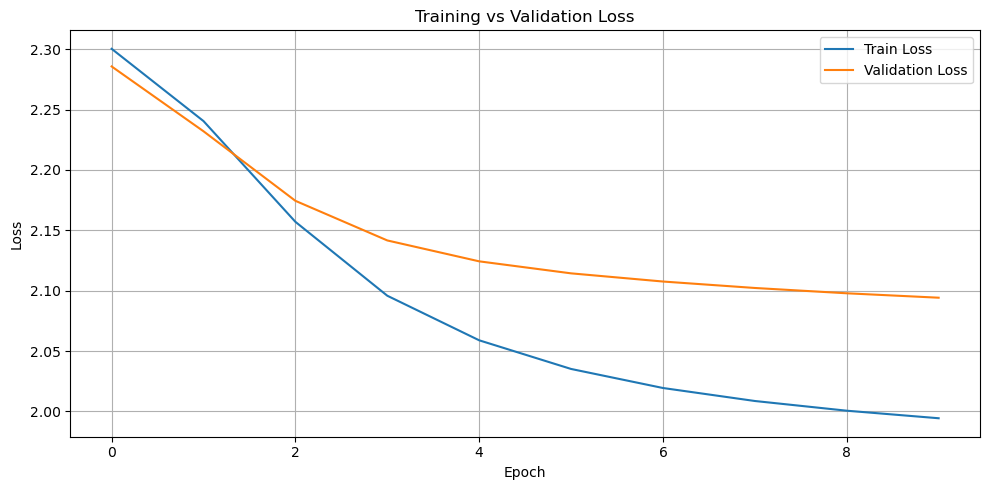

Train accuracy: 0.3285
Test accuracy: 0.1701


In [22]:
model, hist = run_test(n_hidden = 4, hidden_size = 2, activation_hidden = LINEAR)

Epoch 1/10 - loss: 2.3043 - val_loss: 2.3053
[████------------------------------------] 10.0%
Epoch 2/10 - loss: 2.2696 - val_loss: 2.2842
[████████--------------------------------] 20.0%
Epoch 3/10 - loss: 2.2134 - val_loss: 2.2437
[████████████----------------------------] 30.0%
Epoch 4/10 - loss: 2.1582 - val_loss: 2.2280
[████████████████------------------------] 40.0%
Epoch 5/10 - loss: 2.1221 - val_loss: 2.2129
[████████████████████--------------------] 50.0%
Epoch 6/10 - loss: 2.1012 - val_loss: 2.2018
[████████████████████████----------------] 60.0%
Epoch 7/10 - loss: 2.0901 - val_loss: 2.1949
[████████████████████████████------------] 70.0%
Epoch 8/10 - loss: 2.0841 - val_loss: 2.1916
[████████████████████████████████--------] 80.0%
Epoch 9/10 - loss: 2.0803 - val_loss: 2.1891
[████████████████████████████████████----] 90.0%
Epoch 10/10 - loss: 2.0763 - val_loss: 2.1882
[████████████████████████████████████████] 100.0%


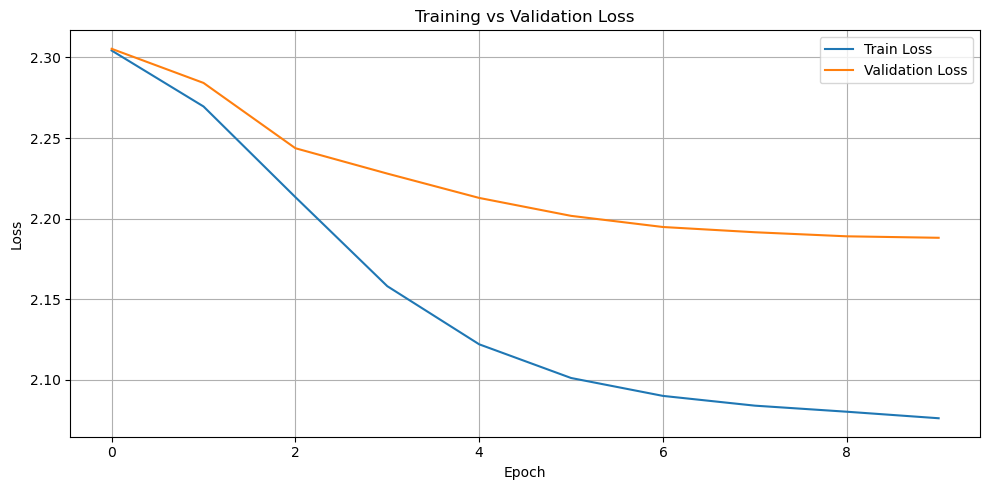

Train accuracy: 0.2340
Test accuracy: 0.1420


In [23]:
model, hist = run_test(n_hidden = 4, hidden_size = 2, activation_hidden = RELU)

Epoch 1/10 - loss: 2.3137 - val_loss: 2.3137
[████------------------------------------] 10.0%
Epoch 2/10 - loss: 2.3137 - val_loss: 2.3137
[████████--------------------------------] 20.0%
Epoch 3/10 - loss: 2.3137 - val_loss: 2.3137
[████████████----------------------------] 30.0%
Epoch 4/10 - loss: 2.3137 - val_loss: 2.3137
[████████████████------------------------] 40.0%
Epoch 5/10 - loss: 2.3137 - val_loss: 2.3137
[████████████████████--------------------] 50.0%
Epoch 6/10 - loss: 2.3137 - val_loss: 2.3137
[████████████████████████----------------] 60.0%
Epoch 7/10 - loss: 2.3137 - val_loss: 2.3137
[████████████████████████████------------] 70.0%
Epoch 8/10 - loss: 2.3137 - val_loss: 2.3137
[████████████████████████████████--------] 80.0%
Epoch 9/10 - loss: 2.3137 - val_loss: 2.3137
[████████████████████████████████████----] 90.0%
Epoch 10/10 - loss: 2.3137 - val_loss: 2.3137
[████████████████████████████████████████] 100.0%


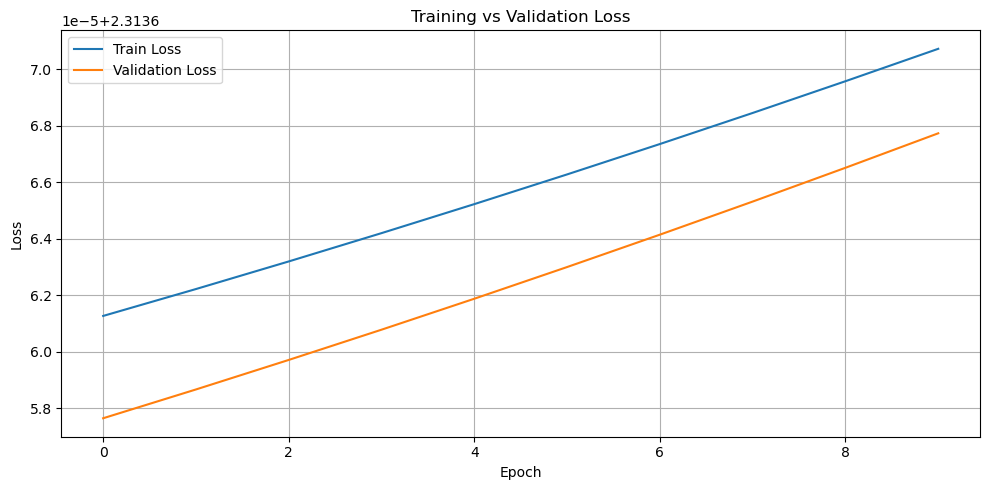

Train accuracy: 0.0668
Test accuracy: 0.0645


In [24]:
model, hist = run_test(n_hidden = 4, hidden_size = 2, activation_hidden = SIGMOID)

Epoch 1/10 - loss: 2.3153 - val_loss: 2.3140
[████------------------------------------] 10.0%
Epoch 2/10 - loss: 2.3130 - val_loss: 2.3118
[████████--------------------------------] 20.0%
Epoch 3/10 - loss: 2.3097 - val_loss: 2.3081
[████████████----------------------------] 30.0%
Epoch 4/10 - loss: 2.3036 - val_loss: 2.3009
[████████████████------------------------] 40.0%
Epoch 5/10 - loss: 2.2918 - val_loss: 2.2874
[████████████████████--------------------] 50.0%
Epoch 6/10 - loss: 2.2705 - val_loss: 2.2635
[████████████████████████----------------] 60.0%
Epoch 7/10 - loss: 2.2342 - val_loss: 2.2244
[████████████████████████████------------] 70.0%
Epoch 8/10 - loss: 2.1845 - val_loss: 2.1800
[████████████████████████████████--------] 80.0%
Epoch 9/10 - loss: 2.1422 - val_loss: 2.1491
[████████████████████████████████████----] 90.0%
Epoch 10/10 - loss: 2.1148 - val_loss: 2.1299
[████████████████████████████████████████] 100.0%


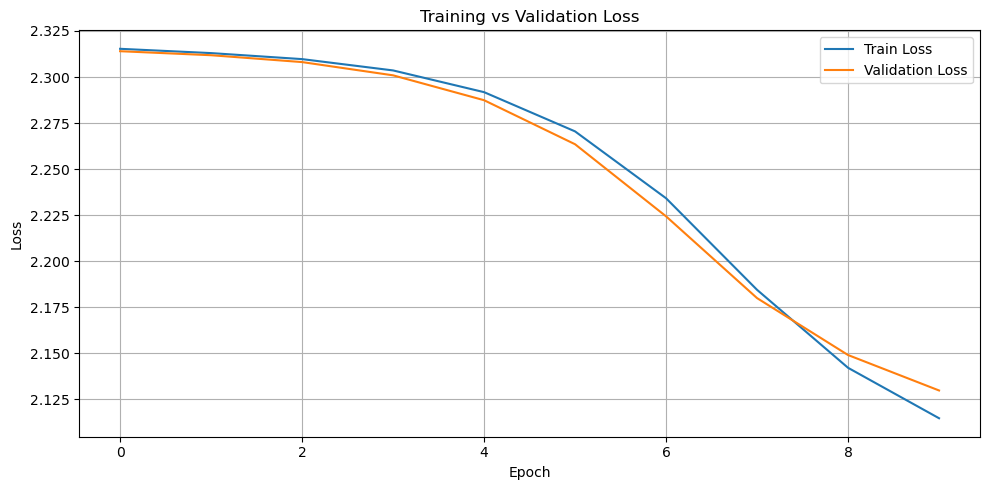

Train accuracy: 0.1870
Test accuracy: 0.1889


In [25]:
model, hist = run_test(n_hidden = 4, hidden_size = 2, activation_hidden = TANH)

## Pengaruh learning rate

Epoch 1/100 - loss: 1.8068 - val_loss: 1.6835
[----------------------------------------] 1.0%
Epoch 2/100 - loss: 1.6410 - val_loss: 1.6264
[----------------------------------------] 2.0%
Epoch 3/100 - loss: 1.6002 - val_loss: 1.5922
[█---------------------------------------] 3.0%
Epoch 4/100 - loss: 1.5759 - val_loss: 1.5691
[█---------------------------------------] 4.0%
Epoch 5/100 - loss: 1.5661 - val_loss: 1.5614
[██--------------------------------------] 5.0%
Epoch 6/100 - loss: 1.5656 - val_loss: 1.5603
[██--------------------------------------] 6.0%
Epoch 7/100 - loss: 1.5714 - val_loss: 1.5660
[██--------------------------------------] 7.0%
Epoch 8/100 - loss: 1.5832 - val_loss: 1.5761
[███-------------------------------------] 8.0%
Epoch 9/100 - loss: 1.6019 - val_loss: 1.5941
[███-------------------------------------] 9.0%
Epoch 10/100 - loss: 1.6247 - val_loss: 1.6159
[████------------------------------------] 10.0%
Epoch 11/100 - loss: 1.6520 - val_loss: 1.6440
[████------

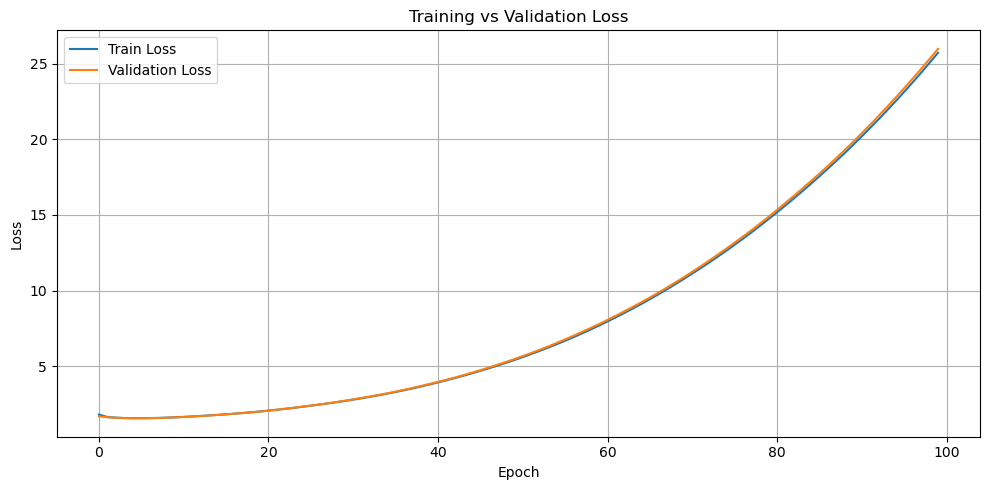

Train accuracy: 0.4442
Test accuracy: 0.4439


In [26]:
model, hist = run_test(activation_hidden = TANH, batch_size = 10, n_hidden = 1, hidden_size = 3, epochs = 100, learning_rate = 0.1)

Epoch 1/100 - loss: 2.1845 - val_loss: 1.9501
[----------------------------------------] 1.0%
Epoch 2/100 - loss: 1.8865 - val_loss: 1.8320
[----------------------------------------] 2.0%
Epoch 3/100 - loss: 1.7959 - val_loss: 1.7821
[█---------------------------------------] 3.0%
Epoch 4/100 - loss: 1.7507 - val_loss: 1.7522
[█---------------------------------------] 4.0%
Epoch 5/100 - loss: 1.7225 - val_loss: 1.7318
[██--------------------------------------] 5.0%
Epoch 6/100 - loss: 1.7028 - val_loss: 1.7170
[██--------------------------------------] 6.0%
Epoch 7/100 - loss: 1.6877 - val_loss: 1.7050
[██--------------------------------------] 7.0%
Epoch 8/100 - loss: 1.6754 - val_loss: 1.6952
[███-------------------------------------] 8.0%
Epoch 9/100 - loss: 1.6650 - val_loss: 1.6867
[███-------------------------------------] 9.0%
Epoch 10/100 - loss: 1.6560 - val_loss: 1.6789
[████------------------------------------] 10.0%
Epoch 11/100 - loss: 1.6482 - val_loss: 1.6718
[████------

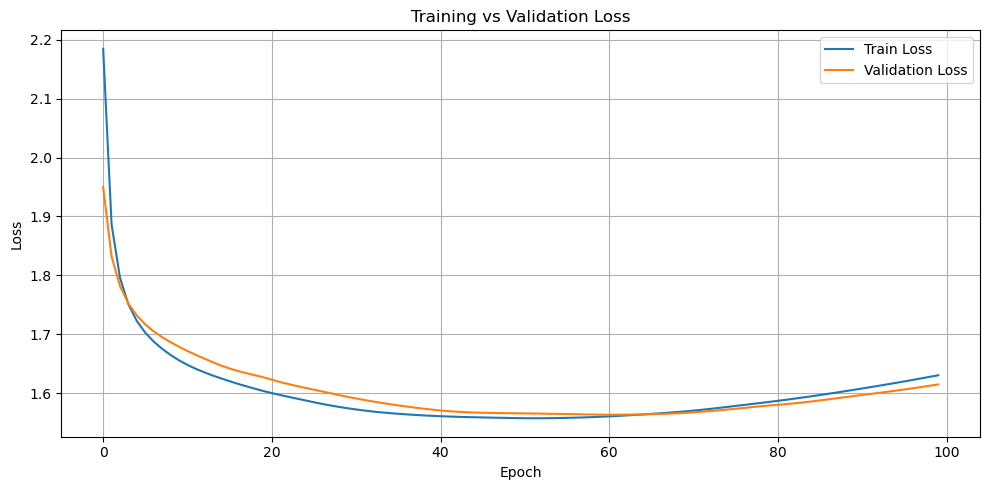

Train accuracy: 0.5060
Test accuracy: 0.4880


In [27]:
model, hist = run_test(activation_hidden = TANH, batch_size = 10, n_hidden = 1, hidden_size = 3, epochs = 100, learning_rate = 0.01)

Epoch 1/100 - loss: 2.5386 - val_loss: 2.4533
[----------------------------------------] 1.0%
Epoch 2/100 - loss: 2.4031 - val_loss: 2.3314
[----------------------------------------] 2.0%
Epoch 3/100 - loss: 2.2989 - val_loss: 2.2382
[█---------------------------------------] 3.0%
Epoch 4/100 - loss: 2.2183 - val_loss: 2.1668
[█---------------------------------------] 4.0%
Epoch 5/100 - loss: 2.1549 - val_loss: 2.1110
[██--------------------------------------] 5.0%
Epoch 6/100 - loss: 2.1039 - val_loss: 2.0662
[██--------------------------------------] 6.0%
Epoch 7/100 - loss: 2.0619 - val_loss: 2.0293
[██--------------------------------------] 7.0%
Epoch 8/100 - loss: 2.0268 - val_loss: 1.9983
[███-------------------------------------] 8.0%
Epoch 9/100 - loss: 1.9969 - val_loss: 1.9722
[███-------------------------------------] 9.0%
Epoch 10/100 - loss: 1.9712 - val_loss: 1.9500
[████------------------------------------] 10.0%
Epoch 11/100 - loss: 1.9488 - val_loss: 1.9308
[████------

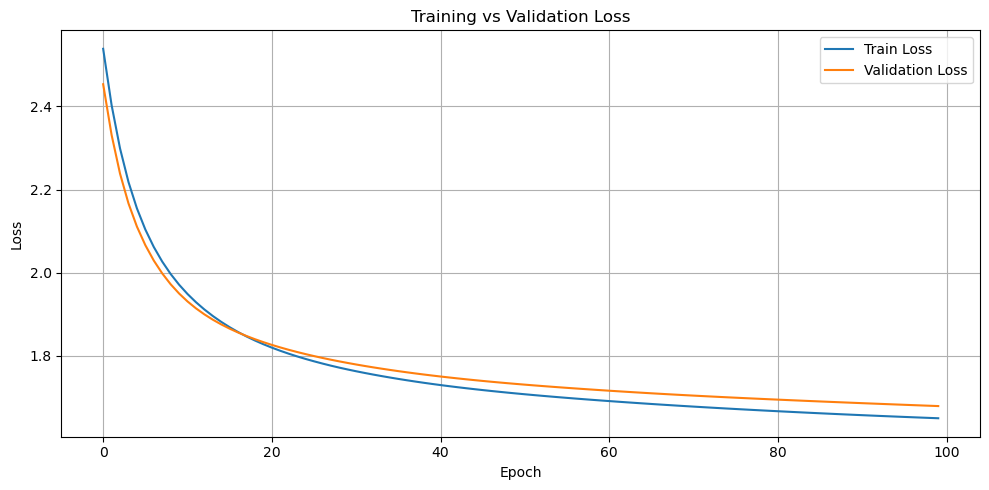

Train accuracy: 0.5032
Test accuracy: 0.4964


In [28]:
model, hist = run_test(activation_hidden = TANH, batch_size = 10, n_hidden = 1, hidden_size = 3, epochs = 100, learning_rate = 0.001)

## Pengaruh inisialisasi bobot

Epoch 1/10 - loss: 2.3026 - val_loss: 2.3026
[████------------------------------------] 10.0%
Epoch 2/10 - loss: 2.3026 - val_loss: 2.3026
[████████--------------------------------] 20.0%
Epoch 3/10 - loss: 2.3026 - val_loss: 2.3026
[████████████----------------------------] 30.0%
Epoch 4/10 - loss: 2.3026 - val_loss: 2.3026
[████████████████------------------------] 40.0%
Epoch 5/10 - loss: 2.3026 - val_loss: 2.3026
[████████████████████--------------------] 50.0%
Epoch 6/10 - loss: 2.3026 - val_loss: 2.3026
[████████████████████████----------------] 60.0%
Epoch 7/10 - loss: 2.3026 - val_loss: 2.3025
[████████████████████████████------------] 70.0%
Epoch 8/10 - loss: 2.3025 - val_loss: 2.3025
[████████████████████████████████--------] 80.0%
Epoch 9/10 - loss: 2.3025 - val_loss: 2.3024
[████████████████████████████████████----] 90.0%
Epoch 10/10 - loss: 2.3024 - val_loss: 2.3024
[████████████████████████████████████████] 100.0%


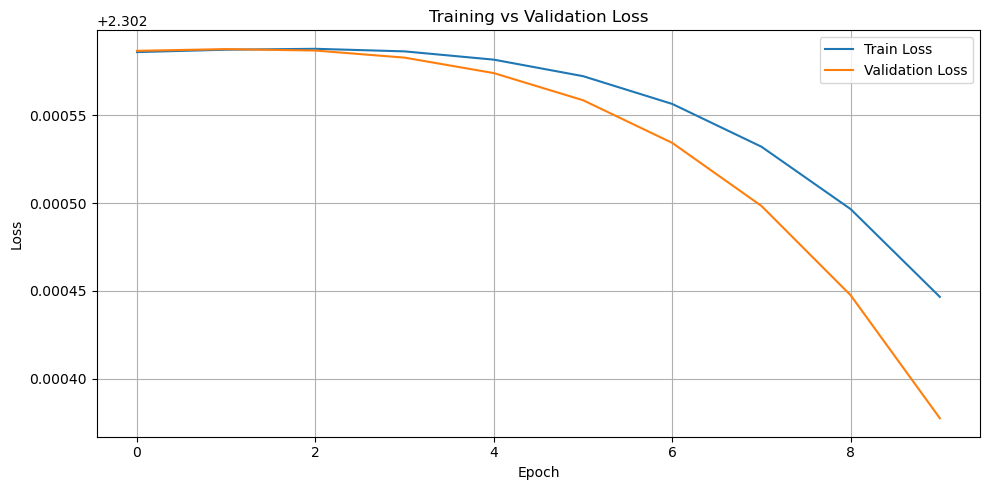

Train accuracy: 0.1740
Test accuracy: 0.1749


In [29]:
model, hist = run_test(weight_init_method = "zero")

Epoch 1/10 - loss: 2.3074 - val_loss: 2.3063
[████------------------------------------] 10.0%
Epoch 2/10 - loss: 2.3067 - val_loss: 2.3055
[████████--------------------------------] 20.0%
Epoch 3/10 - loss: 2.3059 - val_loss: 2.3047
[████████████----------------------------] 30.0%
Epoch 4/10 - loss: 2.3051 - val_loss: 2.3038
[████████████████------------------------] 40.0%
Epoch 5/10 - loss: 2.3042 - val_loss: 2.3028
[████████████████████--------------------] 50.0%
Epoch 6/10 - loss: 2.3032 - val_loss: 2.3017
[████████████████████████----------------] 60.0%
Epoch 7/10 - loss: 2.3022 - val_loss: 2.3005
[████████████████████████████------------] 70.0%
Epoch 8/10 - loss: 2.3010 - val_loss: 2.2992
[████████████████████████████████--------] 80.0%
Epoch 9/10 - loss: 2.2996 - val_loss: 2.2977
[████████████████████████████████████----] 90.0%
Epoch 10/10 - loss: 2.2982 - val_loss: 2.2961
[████████████████████████████████████████] 100.0%


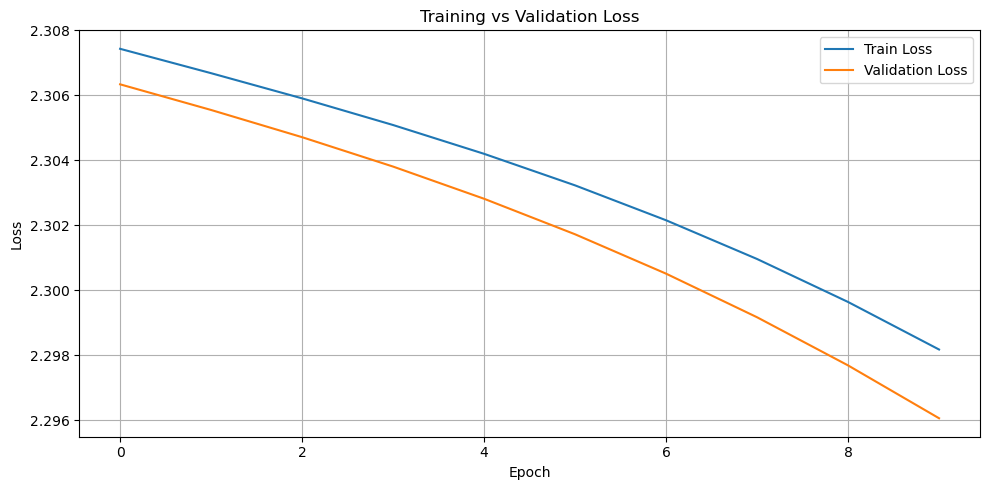

Train accuracy: 0.1625
Test accuracy: 0.1636


In [30]:
model, hist = run_test(weight_init_method = "uniform")

Epoch 1/10 - loss: 2.3276 - val_loss: 2.3242
[████------------------------------------] 10.0%
Epoch 2/10 - loss: 2.3211 - val_loss: 2.3177
[████████--------------------------------] 20.0%
Epoch 3/10 - loss: 2.3150 - val_loss: 2.3116
[████████████----------------------------] 30.0%
Epoch 4/10 - loss: 2.3091 - val_loss: 2.3059
[████████████████------------------------] 40.0%
Epoch 5/10 - loss: 2.3036 - val_loss: 2.3004
[████████████████████--------------------] 50.0%
Epoch 6/10 - loss: 2.2985 - val_loss: 2.2949
[████████████████████████----------------] 60.0%
Epoch 7/10 - loss: 2.2936 - val_loss: 2.2894
[████████████████████████████------------] 70.0%
Epoch 8/10 - loss: 2.2891 - val_loss: 2.2841
[████████████████████████████████--------] 80.0%
Epoch 9/10 - loss: 2.2848 - val_loss: 2.2790
[████████████████████████████████████----] 90.0%
Epoch 10/10 - loss: 2.2806 - val_loss: 2.2743
[████████████████████████████████████████] 100.0%


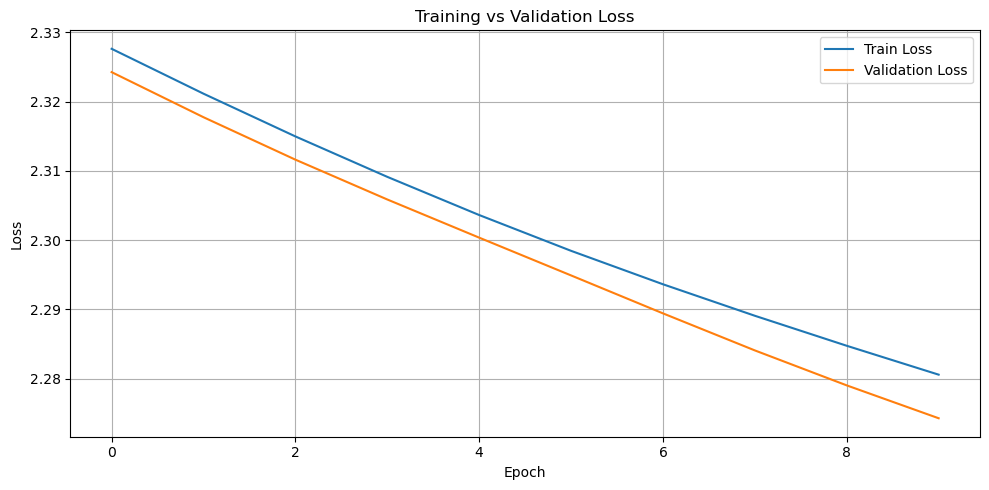

Train accuracy: 0.1605
Test accuracy: 0.1706


In [31]:
model, hist = run_test(weight_init_method = "normal")

## Pengaruh regularisasi

Epoch 1/10 - loss: 2.2099 - val_loss: 2.1457
[████------------------------------------] 10.0%
Epoch 2/10 - loss: 2.1253 - val_loss: 2.1142
[████████--------------------------------] 20.0%
Epoch 3/10 - loss: 2.1037 - val_loss: 2.1034
[████████████----------------------------] 30.0%
Epoch 4/10 - loss: 2.0942 - val_loss: 2.0978
[████████████████------------------------] 40.0%
Epoch 5/10 - loss: 2.0885 - val_loss: 2.0941
[████████████████████--------------------] 50.0%
Epoch 6/10 - loss: 2.0849 - val_loss: 2.0911
[████████████████████████----------------] 60.0%
Epoch 7/10 - loss: 2.0823 - val_loss: 2.0886
[████████████████████████████------------] 70.0%
Epoch 8/10 - loss: 2.0803 - val_loss: 2.0864
[████████████████████████████████--------] 80.0%
Epoch 9/10 - loss: 2.0785 - val_loss: 2.0844
[████████████████████████████████████----] 90.0%
Epoch 10/10 - loss: 2.0770 - val_loss: 2.0826
[████████████████████████████████████████] 100.0%


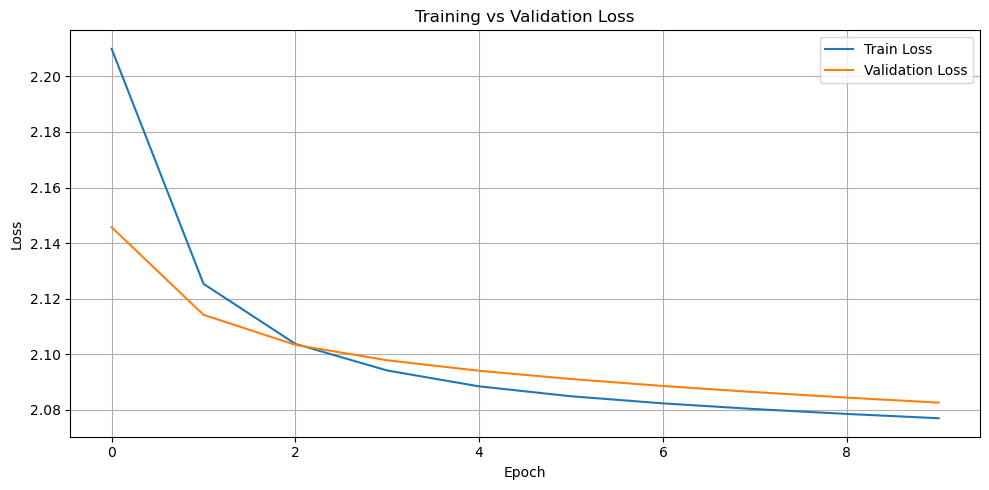

Train accuracy: 0.1998
Test accuracy: 0.2060


In [32]:
model, hist = run_test(lambda_L1 = 0, lambda_L2 = 0)

Epoch 1/10 - loss: 2.2141 - val_loss: 2.1500
[████------------------------------------] 10.0%
Epoch 2/10 - loss: 2.1297 - val_loss: 2.1186
[████████--------------------------------] 20.0%
Epoch 3/10 - loss: 2.1082 - val_loss: 2.1080
[████████████----------------------------] 30.0%
Epoch 4/10 - loss: 2.0989 - val_loss: 2.1027
[████████████████------------------------] 40.0%
Epoch 5/10 - loss: 2.0934 - val_loss: 2.0992
[████████████████████--------------------] 50.0%
Epoch 6/10 - loss: 2.0901 - val_loss: 2.0965
[████████████████████████----------------] 60.0%
Epoch 7/10 - loss: 2.0878 - val_loss: 2.0943
[████████████████████████████------------] 70.0%
Epoch 8/10 - loss: 2.0861 - val_loss: 2.0924
[████████████████████████████████--------] 80.0%
Epoch 9/10 - loss: 2.0847 - val_loss: 2.0907
[████████████████████████████████████----] 90.0%
Epoch 10/10 - loss: 2.0834 - val_loss: 2.0892
[████████████████████████████████████████] 100.0%


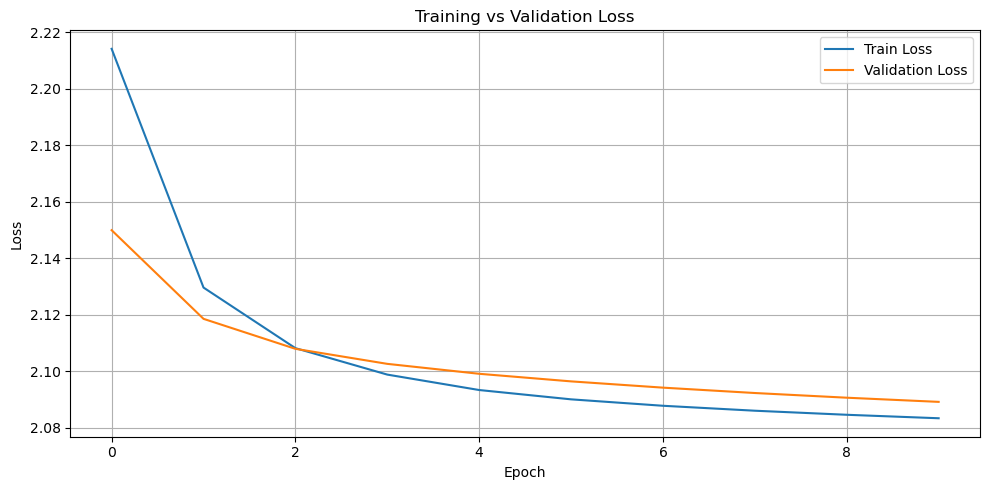

Train accuracy: 0.1998
Test accuracy: 0.2060


In [33]:
model, hist = run_test(lambda_L1 = 1e-4, lambda_L2 = 0)

Epoch 1/10 - loss: 2.2118 - val_loss: 2.1476
[████------------------------------------] 10.0%
Epoch 2/10 - loss: 2.1273 - val_loss: 2.1161
[████████--------------------------------] 20.0%
Epoch 3/10 - loss: 2.1057 - val_loss: 2.1054
[████████████----------------------------] 30.0%
Epoch 4/10 - loss: 2.0962 - val_loss: 2.0999
[████████████████------------------------] 40.0%
Epoch 5/10 - loss: 2.0905 - val_loss: 2.0961
[████████████████████--------------------] 50.0%
Epoch 6/10 - loss: 2.0870 - val_loss: 2.0932
[████████████████████████----------------] 60.0%
Epoch 7/10 - loss: 2.0845 - val_loss: 2.0908
[████████████████████████████------------] 70.0%
Epoch 8/10 - loss: 2.0825 - val_loss: 2.0887
[████████████████████████████████--------] 80.0%
Epoch 9/10 - loss: 2.0809 - val_loss: 2.0868
[████████████████████████████████████----] 90.0%
Epoch 10/10 - loss: 2.0794 - val_loss: 2.0851
[████████████████████████████████████████] 100.0%


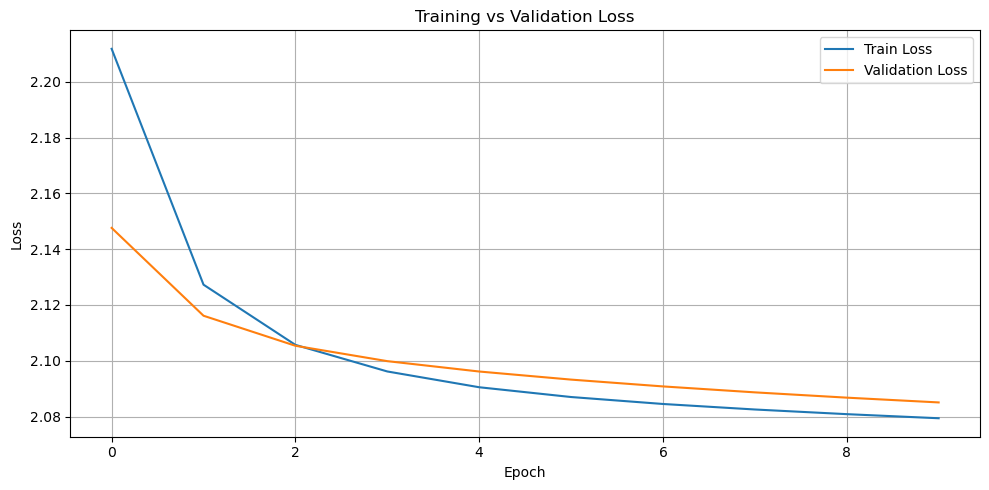

Train accuracy: 0.1998
Test accuracy: 0.2060


In [34]:
model, hist = run_test(lambda_L1 = 0, lambda_L2 = 1e-4)